## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.01),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.98433 | train_mse: 0.62165 | train_mae: 0.62437 |  0:00:00s


epoch 1  | loss: 0.29433 | train_mse: 0.29508 | train_mae: 0.39667 |  0:00:01s


epoch 2  | loss: 0.20986 | train_mse: 0.40693 | train_mae: 0.39217 |  0:00:02s


epoch 3  | loss: 0.19086 | train_mse: 0.16158 | train_mae: 0.30931 |  0:00:02s


epoch 4  | loss: 0.17321 | train_mse: 0.11714 | train_mae: 0.28107 |  0:00:03s


epoch 5  | loss: 0.13544 | train_mse: 0.09544 | train_mae: 0.24795 |  0:00:04s


epoch 6  | loss: 0.13651 | train_mse: 0.11177 | train_mae: 0.23525 |  0:00:04s


epoch 7  | loss: 0.12075 | train_mse: 0.07283 | train_mae: 0.20304 |  0:00:05s


epoch 8  | loss: 0.10284 | train_mse: 0.06633 | train_mae: 0.19677 |  0:00:05s


epoch 9  | loss: 0.09583 | train_mse: 0.06783 | train_mae: 0.19309 |  0:00:06s


epoch 10 | loss: 0.12412 | train_mse: 0.06037 | train_mae: 0.1936  |  0:00:07s


epoch 11 | loss: 0.10402 | train_mse: 0.06808 | train_mae: 0.19268 |  0:00:07s


epoch 12 | loss: 0.10048 | train_mse: 0.05099 | train_mae: 0.17406 |  0:00:08s


epoch 13 | loss: 0.09356 | train_mse: 0.06078 | train_mae: 0.18168 |  0:00:09s


epoch 14 | loss: 0.0908  | train_mse: 0.07534 | train_mae: 0.20793 |  0:00:09s


epoch 15 | loss: 0.08965 | train_mse: 0.09055 | train_mae: 0.21555 |  0:00:10s


epoch 16 | loss: 0.10104 | train_mse: 0.10426 | train_mae: 0.23776 |  0:00:10s


epoch 17 | loss: 0.0873  | train_mse: 0.05154 | train_mae: 0.17339 |  0:00:11s


epoch 18 | loss: 0.08767 | train_mse: 0.05371 | train_mae: 0.15807 |  0:00:12s


epoch 19 | loss: 0.08963 | train_mse: 0.03201 | train_mae: 0.13116 |  0:00:12s


epoch 20 | loss: 0.07057 | train_mse: 0.07847 | train_mae: 0.20051 |  0:00:13s


epoch 21 | loss: 0.06704 | train_mse: 0.04017 | train_mae: 0.16155 |  0:00:13s


epoch 22 | loss: 0.08241 | train_mse: 0.04172 | train_mae: 0.15355 |  0:00:14s


epoch 23 | loss: 0.06755 | train_mse: 0.03729 | train_mae: 0.14022 |  0:00:14s


epoch 24 | loss: 0.06891 | train_mse: 0.02808 | train_mae: 0.12547 |  0:00:15s


epoch 25 | loss: 0.08691 | train_mse: 0.02832 | train_mae: 0.12743 |  0:00:15s


epoch 26 | loss: 0.07246 | train_mse: 0.02828 | train_mae: 0.12558 |  0:00:16s


epoch 27 | loss: 0.06021 | train_mse: 0.02404 | train_mae: 0.1166  |  0:00:17s


epoch 28 | loss: 0.064   | train_mse: 0.05699 | train_mae: 0.18506 |  0:00:17s


epoch 29 | loss: 0.06971 | train_mse: 0.02836 | train_mae: 0.13468 |  0:00:18s


epoch 30 | loss: 0.08325 | train_mse: 0.03132 | train_mae: 0.14808 |  0:00:18s


epoch 31 | loss: 0.06099 | train_mse: 0.02668 | train_mae: 0.13056 |  0:00:19s


epoch 32 | loss: 0.04933 | train_mse: 0.0321  | train_mae: 0.14183 |  0:00:19s


epoch 33 | loss: 0.04552 | train_mse: 0.02729 | train_mae: 0.12262 |  0:00:20s


epoch 34 | loss: 0.05221 | train_mse: 0.02105 | train_mae: 0.11769 |  0:00:20s


epoch 35 | loss: 0.07685 | train_mse: 0.01843 | train_mae: 0.10729 |  0:00:21s


epoch 36 | loss: 0.06514 | train_mse: 0.03132 | train_mae: 0.14801 |  0:00:22s


epoch 37 | loss: 0.05373 | train_mse: 0.02424 | train_mae: 0.12621 |  0:00:22s


epoch 38 | loss: 0.05539 | train_mse: 0.06569 | train_mae: 0.20452 |  0:00:23s


epoch 39 | loss: 0.08258 | train_mse: 0.03972 | train_mae: 0.14241 |  0:00:23s


epoch 40 | loss: 0.0684  | train_mse: 0.0307  | train_mae: 0.13317 |  0:00:24s


epoch 41 | loss: 0.07773 | train_mse: 0.02991 | train_mae: 0.12773 |  0:00:24s


epoch 42 | loss: 0.06128 | train_mse: 0.03141 | train_mae: 0.13795 |  0:00:25s


epoch 43 | loss: 0.04997 | train_mse: 0.02477 | train_mae: 0.1153  |  0:00:25s


epoch 44 | loss: 0.05235 | train_mse: 0.02287 | train_mae: 0.11803 |  0:00:26s


epoch 45 | loss: 0.04942 | train_mse: 0.01886 | train_mae: 0.10277 |  0:00:27s


epoch 46 | loss: 0.06465 | train_mse: 0.01854 | train_mae: 0.10592 |  0:00:27s


epoch 47 | loss: 0.0451  | train_mse: 0.02515 | train_mae: 0.1322  |  0:00:28s


epoch 48 | loss: 0.05992 | train_mse: 0.02412 | train_mae: 0.12691 |  0:00:28s


epoch 49 | loss: 0.04033 | train_mse: 0.01752 | train_mae: 0.10082 |  0:00:29s


epoch 50 | loss: 0.04568 | train_mse: 0.02286 | train_mae: 0.11832 |  0:00:29s


epoch 51 | loss: 0.05659 | train_mse: 0.03346 | train_mae: 0.13805 |  0:00:30s


epoch 52 | loss: 0.05638 | train_mse: 0.08517 | train_mae: 0.19678 |  0:00:31s


epoch 53 | loss: 0.05705 | train_mse: 0.05485 | train_mae: 0.17576 |  0:00:31s


epoch 54 | loss: 0.06376 | train_mse: 0.03056 | train_mae: 0.13548 |  0:00:32s


epoch 55 | loss: 0.0455  | train_mse: 0.02163 | train_mae: 0.10601 |  0:00:32s


epoch 56 | loss: 0.05488 | train_mse: 0.01754 | train_mae: 0.09616 |  0:00:33s


epoch 57 | loss: 0.04714 | train_mse: 0.04344 | train_mae: 0.13331 |  0:00:33s


epoch 58 | loss: 0.04916 | train_mse: 0.03942 | train_mae: 0.13554 |  0:00:34s


epoch 59 | loss: 0.04039 | train_mse: 0.02509 | train_mae: 0.11741 |  0:00:35s


epoch 60 | loss: 0.04552 | train_mse: 0.01735 | train_mae: 0.09892 |  0:00:35s


epoch 61 | loss: 0.06156 | train_mse: 0.03236 | train_mae: 0.12439 |  0:00:36s


epoch 62 | loss: 0.05987 | train_mse: 0.05485 | train_mae: 0.17174 |  0:00:36s


epoch 63 | loss: 0.0762  | train_mse: 0.03619 | train_mae: 0.15307 |  0:00:37s


epoch 64 | loss: 0.05747 | train_mse: 0.02348 | train_mae: 0.11378 |  0:00:37s


epoch 65 | loss: 0.05514 | train_mse: 0.03369 | train_mae: 0.13352 |  0:00:38s


epoch 66 | loss: 0.05367 | train_mse: 0.03014 | train_mae: 0.1294  |  0:00:38s


epoch 67 | loss: 0.06092 | train_mse: 0.0263  | train_mae: 0.13154 |  0:00:39s


epoch 68 | loss: 0.06689 | train_mse: 0.02925 | train_mae: 0.12502 |  0:00:40s


epoch 69 | loss: 0.04842 | train_mse: 0.01885 | train_mae: 0.10068 |  0:00:40s


epoch 70 | loss: 0.03554 | train_mse: 0.02316 | train_mae: 0.11857 |  0:00:41s


epoch 71 | loss: 0.05309 | train_mse: 0.02087 | train_mae: 0.10546 |  0:00:41s


epoch 72 | loss: 0.04735 | train_mse: 0.01631 | train_mae: 0.09196 |  0:00:42s


epoch 73 | loss: 0.0452  | train_mse: 0.01962 | train_mae: 0.10188 |  0:00:42s


epoch 74 | loss: 0.0508  | train_mse: 0.02461 | train_mae: 0.10952 |  0:00:43s


epoch 75 | loss: 0.03826 | train_mse: 0.0256  | train_mae: 0.11333 |  0:00:43s


epoch 76 | loss: 0.04323 | train_mse: 0.01548 | train_mae: 0.09047 |  0:00:44s


epoch 77 | loss: 0.03915 | train_mse: 0.01045 | train_mae: 0.07741 |  0:00:45s


epoch 78 | loss: 0.02933 | train_mse: 0.01038 | train_mae: 0.07676 |  0:00:45s


epoch 79 | loss: 0.03757 | train_mse: 0.00917 | train_mae: 0.07253 |  0:00:46s


epoch 80 | loss: 0.03125 | train_mse: 0.01441 | train_mae: 0.08916 |  0:00:46s


epoch 81 | loss: 0.03634 | train_mse: 0.02378 | train_mae: 0.11441 |  0:00:47s


epoch 82 | loss: 0.04603 | train_mse: 0.01521 | train_mae: 0.09398 |  0:00:47s


epoch 83 | loss: 0.04241 | train_mse: 0.01316 | train_mae: 0.08412 |  0:00:48s


epoch 84 | loss: 0.04025 | train_mse: 0.02089 | train_mae: 0.10844 |  0:00:49s


epoch 85 | loss: 0.03409 | train_mse: 0.01741 | train_mae: 0.09676 |  0:00:49s


epoch 86 | loss: 0.02989 | train_mse: 0.01595 | train_mae: 0.09123 |  0:00:50s


epoch 87 | loss: 0.0322  | train_mse: 0.01108 | train_mae: 0.07923 |  0:00:50s


epoch 88 | loss: 0.04587 | train_mse: 0.01223 | train_mae: 0.0774  |  0:00:51s


epoch 89 | loss: 0.02298 | train_mse: 0.00863 | train_mae: 0.06547 |  0:00:51s


epoch 90 | loss: 0.02592 | train_mse: 0.01252 | train_mae: 0.07831 |  0:00:52s


epoch 91 | loss: 0.04545 | train_mse: 0.01052 | train_mae: 0.07688 |  0:00:53s


epoch 92 | loss: 0.03362 | train_mse: 0.01442 | train_mae: 0.08787 |  0:00:53s


epoch 93 | loss: 0.03504 | train_mse: 0.01695 | train_mae: 0.09678 |  0:00:54s


epoch 94 | loss: 0.03497 | train_mse: 0.00898 | train_mae: 0.06938 |  0:00:54s


epoch 95 | loss: 0.02358 | train_mse: 0.01264 | train_mae: 0.08069 |  0:00:55s


epoch 96 | loss: 0.03093 | train_mse: 0.01417 | train_mae: 0.08398 |  0:00:55s


epoch 97 | loss: 0.0296  | train_mse: 0.00897 | train_mae: 0.07415 |  0:00:56s


epoch 98 | loss: 0.03074 | train_mse: 0.01248 | train_mae: 0.08411 |  0:00:56s


epoch 99 | loss: 0.04324 | train_mse: 0.01421 | train_mae: 0.09456 |  0:00:57s


epoch 100| loss: 0.03353 | train_mse: 0.0173  | train_mae: 0.09112 |  0:00:58s


epoch 101| loss: 0.0389  | train_mse: 0.01154 | train_mae: 0.07829 |  0:00:58s


epoch 102| loss: 0.04575 | train_mse: 0.01524 | train_mae: 0.09329 |  0:00:59s


epoch 103| loss: 0.05218 | train_mse: 0.01245 | train_mae: 0.07617 |  0:00:59s


epoch 104| loss: 0.0376  | train_mse: 0.01574 | train_mae: 0.09712 |  0:01:00s


epoch 105| loss: 0.03261 | train_mse: 0.0323  | train_mae: 0.10357 |  0:01:00s


epoch 106| loss: 0.03286 | train_mse: 0.02967 | train_mae: 0.1265  |  0:01:01s


epoch 107| loss: 0.03232 | train_mse: 0.01609 | train_mae: 0.09128 |  0:01:02s


epoch 108| loss: 0.04018 | train_mse: 0.00844 | train_mae: 0.06911 |  0:01:02s


epoch 109| loss: 0.03195 | train_mse: 0.01939 | train_mae: 0.09832 |  0:01:03s


epoch 110| loss: 0.03464 | train_mse: 0.01898 | train_mae: 0.10026 |  0:01:03s


epoch 111| loss: 0.04328 | train_mse: 0.01234 | train_mae: 0.08787 |  0:01:04s


epoch 112| loss: 0.0305  | train_mse: 0.01075 | train_mae: 0.08606 |  0:01:05s


epoch 113| loss: 0.03142 | train_mse: 0.01294 | train_mae: 0.09133 |  0:01:05s


epoch 114| loss: 0.02854 | train_mse: 0.01299 | train_mae: 0.0863  |  0:01:06s


epoch 115| loss: 0.03616 | train_mse: 0.01089 | train_mae: 0.07843 |  0:01:06s


epoch 116| loss: 0.02652 | train_mse: 0.01482 | train_mae: 0.08459 |  0:01:07s


epoch 117| loss: 0.02346 | train_mse: 0.01545 | train_mae: 0.09576 |  0:01:07s


epoch 118| loss: 0.02481 | train_mse: 0.01498 | train_mae: 0.09621 |  0:01:08s


epoch 119| loss: 0.03488 | train_mse: 0.00922 | train_mae: 0.07369 |  0:01:09s


epoch 120| loss: 0.02735 | train_mse: 0.01045 | train_mae: 0.07725 |  0:01:09s


epoch 121| loss: 0.02694 | train_mse: 0.00929 | train_mae: 0.0712  |  0:01:10s


epoch 122| loss: 0.03931 | train_mse: 0.01009 | train_mae: 0.07294 |  0:01:10s


epoch 123| loss: 0.04509 | train_mse: 0.0081  | train_mae: 0.07057 |  0:01:11s


epoch 124| loss: 0.03293 | train_mse: 0.00888 | train_mae: 0.07267 |  0:01:11s


epoch 125| loss: 0.03033 | train_mse: 0.0117  | train_mae: 0.07893 |  0:01:12s


epoch 126| loss: 0.02695 | train_mse: 0.01025 | train_mae: 0.07655 |  0:01:13s


epoch 127| loss: 0.02254 | train_mse: 0.01431 | train_mae: 0.08835 |  0:01:13s


epoch 128| loss: 0.0226  | train_mse: 0.02126 | train_mae: 0.1026  |  0:01:14s


epoch 129| loss: 0.03529 | train_mse: 0.01406 | train_mae: 0.08708 |  0:01:14s


epoch 130| loss: 0.02116 | train_mse: 0.01066 | train_mae: 0.07442 |  0:01:15s


epoch 131| loss: 0.03756 | train_mse: 0.00694 | train_mae: 0.0622  |  0:01:15s


epoch 132| loss: 0.02604 | train_mse: 0.00642 | train_mae: 0.05921 |  0:01:16s


epoch 133| loss: 0.02883 | train_mse: 0.00908 | train_mae: 0.07004 |  0:01:16s


epoch 134| loss: 0.03058 | train_mse: 0.02137 | train_mae: 0.1048  |  0:01:17s


epoch 135| loss: 0.03277 | train_mse: 0.016   | train_mae: 0.09055 |  0:01:18s


epoch 136| loss: 0.03587 | train_mse: 0.01217 | train_mae: 0.09163 |  0:01:18s


epoch 137| loss: 0.02346 | train_mse: 0.01296 | train_mae: 0.09261 |  0:01:19s


epoch 138| loss: 0.04514 | train_mse: 0.01069 | train_mae: 0.08244 |  0:01:19s


epoch 139| loss: 0.02844 | train_mse: 0.01051 | train_mae: 0.07264 |  0:01:20s


epoch 140| loss: 0.0307  | train_mse: 0.02005 | train_mae: 0.11843 |  0:01:20s


epoch 141| loss: 0.03903 | train_mse: 0.01603 | train_mae: 0.10657 |  0:01:21s


epoch 142| loss: 0.03281 | train_mse: 0.01423 | train_mae: 0.09026 |  0:01:21s


epoch 143| loss: 0.04231 | train_mse: 0.00745 | train_mae: 0.06594 |  0:01:22s


epoch 144| loss: 0.02671 | train_mse: 0.00666 | train_mae: 0.06397 |  0:01:23s


epoch 145| loss: 0.03737 | train_mse: 0.00954 | train_mae: 0.06887 |  0:01:23s


epoch 146| loss: 0.03293 | train_mse: 0.0141  | train_mae: 0.08511 |  0:01:24s


epoch 147| loss: 0.02672 | train_mse: 0.00851 | train_mae: 0.07152 |  0:01:24s


epoch 148| loss: 0.03572 | train_mse: 0.01082 | train_mae: 0.0826  |  0:01:25s


epoch 149| loss: 0.02919 | train_mse: 0.01214 | train_mae: 0.08678 |  0:01:25s


epoch 150| loss: 0.029   | train_mse: 0.01883 | train_mae: 0.1053  |  0:01:26s


epoch 151| loss: 0.05759 | train_mse: 0.02029 | train_mae: 0.09703 |  0:01:26s


epoch 152| loss: 0.0354  | train_mse: 0.02535 | train_mae: 0.10948 |  0:01:27s


epoch 153| loss: 0.03963 | train_mse: 0.01117 | train_mae: 0.07854 |  0:01:28s


epoch 154| loss: 0.02259 | train_mse: 0.00954 | train_mae: 0.07171 |  0:01:28s


epoch 155| loss: 0.02356 | train_mse: 0.00729 | train_mae: 0.06589 |  0:01:29s


epoch 156| loss: 0.02791 | train_mse: 0.00671 | train_mae: 0.06381 |  0:01:29s


epoch 157| loss: 0.02696 | train_mse: 0.00758 | train_mae: 0.06518 |  0:01:30s


epoch 158| loss: 0.02078 | train_mse: 0.01557 | train_mae: 0.08743 |  0:01:30s


epoch 159| loss: 0.03447 | train_mse: 0.0139  | train_mae: 0.07689 |  0:01:31s


epoch 160| loss: 0.03465 | train_mse: 0.01423 | train_mae: 0.08788 |  0:01:31s


epoch 161| loss: 0.04615 | train_mse: 0.00867 | train_mae: 0.07127 |  0:01:32s


epoch 162| loss: 0.02298 | train_mse: 0.00847 | train_mae: 0.06937 |  0:01:33s


epoch 163| loss: 0.02277 | train_mse: 0.00719 | train_mae: 0.06308 |  0:01:33s


epoch 164| loss: 0.03411 | train_mse: 0.01146 | train_mae: 0.08221 |  0:01:34s


epoch 165| loss: 0.02538 | train_mse: 0.00733 | train_mae: 0.06785 |  0:01:34s


epoch 166| loss: 0.03046 | train_mse: 0.02219 | train_mae: 0.09369 |  0:01:35s


epoch 167| loss: 0.02868 | train_mse: 0.0163  | train_mae: 0.0884  |  0:01:35s


epoch 168| loss: 0.01922 | train_mse: 0.00913 | train_mae: 0.06868 |  0:01:36s


epoch 169| loss: 0.01784 | train_mse: 0.00652 | train_mae: 0.06016 |  0:01:37s


epoch 170| loss: 0.01896 | train_mse: 0.01438 | train_mae: 0.08337 |  0:01:37s


epoch 171| loss: 0.01824 | train_mse: 0.01571 | train_mae: 0.08613 |  0:01:38s


epoch 172| loss: 0.02171 | train_mse: 0.00934 | train_mae: 0.07464 |  0:01:38s


epoch 173| loss: 0.02371 | train_mse: 0.00929 | train_mae: 0.07463 |  0:01:39s


epoch 174| loss: 0.03817 | train_mse: 0.01147 | train_mae: 0.07559 |  0:01:39s


epoch 175| loss: 0.01808 | train_mse: 0.00511 | train_mae: 0.05201 |  0:01:40s


epoch 176| loss: 0.02043 | train_mse: 0.00744 | train_mae: 0.06629 |  0:01:40s


epoch 177| loss: 0.03587 | train_mse: 0.00988 | train_mae: 0.08302 |  0:01:41s


epoch 178| loss: 0.02652 | train_mse: 0.00644 | train_mae: 0.05831 |  0:01:42s


epoch 179| loss: 0.02763 | train_mse: 0.0074  | train_mae: 0.06642 |  0:01:42s


epoch 180| loss: 0.03328 | train_mse: 0.0124  | train_mae: 0.08273 |  0:01:43s


epoch 181| loss: 0.01727 | train_mse: 0.01197 | train_mae: 0.09115 |  0:01:43s


epoch 182| loss: 0.03116 | train_mse: 0.00971 | train_mae: 0.07959 |  0:01:44s


epoch 183| loss: 0.01747 | train_mse: 0.0113  | train_mae: 0.08544 |  0:01:44s


epoch 184| loss: 0.02074 | train_mse: 0.01089 | train_mae: 0.08368 |  0:01:45s


epoch 185| loss: 0.02381 | train_mse: 0.00773 | train_mae: 0.06896 |  0:01:45s


epoch 186| loss: 0.02132 | train_mse: 0.00717 | train_mae: 0.05929 |  0:01:46s


epoch 187| loss: 0.02085 | train_mse: 0.01239 | train_mae: 0.09326 |  0:01:47s


epoch 188| loss: 0.03779 | train_mse: 0.00743 | train_mae: 0.06483 |  0:01:47s


epoch 189| loss: 0.02617 | train_mse: 0.01261 | train_mae: 0.09395 |  0:01:48s


epoch 190| loss: 0.02363 | train_mse: 0.00966 | train_mae: 0.07736 |  0:01:48s


epoch 191| loss: 0.02053 | train_mse: 0.00678 | train_mae: 0.05881 |  0:01:49s


epoch 192| loss: 0.02602 | train_mse: 0.00496 | train_mae: 0.05401 |  0:01:49s


epoch 193| loss: 0.02138 | train_mse: 0.00612 | train_mae: 0.05802 |  0:01:50s


epoch 194| loss: 0.02526 | train_mse: 0.01065 | train_mae: 0.07892 |  0:01:50s


epoch 195| loss: 0.01742 | train_mse: 0.01643 | train_mae: 0.09541 |  0:01:51s


epoch 196| loss: 0.02331 | train_mse: 0.00706 | train_mae: 0.0657  |  0:01:51s


epoch 197| loss: 0.02255 | train_mse: 0.0089  | train_mae: 0.07038 |  0:01:52s


epoch 198| loss: 0.02166 | train_mse: 0.01238 | train_mae: 0.08921 |  0:01:53s


epoch 199| loss: 0.02569 | train_mse: 0.00745 | train_mae: 0.07064 |  0:01:53s


epoch 200| loss: 0.02225 | train_mse: 0.00727 | train_mae: 0.06384 |  0:01:54s


epoch 201| loss: 0.01899 | train_mse: 0.00831 | train_mae: 0.06684 |  0:01:54s


epoch 202| loss: 0.02538 | train_mse: 0.01003 | train_mae: 0.07388 |  0:01:55s


epoch 203| loss: 0.01927 | train_mse: 0.00629 | train_mae: 0.06238 |  0:01:55s


epoch 204| loss: 0.01971 | train_mse: 0.00786 | train_mae: 0.07211 |  0:01:56s


epoch 205| loss: 0.02574 | train_mse: 0.0067  | train_mae: 0.06196 |  0:01:56s


epoch 206| loss: 0.02595 | train_mse: 0.00656 | train_mae: 0.06113 |  0:01:57s


epoch 207| loss: 0.02884 | train_mse: 0.01061 | train_mae: 0.0846  |  0:01:58s


epoch 208| loss: 0.03652 | train_mse: 0.01656 | train_mae: 0.09565 |  0:01:58s


epoch 209| loss: 0.02941 | train_mse: 0.01193 | train_mae: 0.08467 |  0:01:59s


epoch 210| loss: 0.02706 | train_mse: 0.01234 | train_mae: 0.08274 |  0:01:59s


epoch 211| loss: 0.02595 | train_mse: 0.00958 | train_mae: 0.07439 |  0:02:00s


epoch 212| loss: 0.02458 | train_mse: 0.00672 | train_mae: 0.06425 |  0:02:00s


epoch 213| loss: 0.01678 | train_mse: 0.00603 | train_mae: 0.05899 |  0:02:01s


epoch 214| loss: 0.01663 | train_mse: 0.0132  | train_mae: 0.08741 |  0:02:02s


epoch 215| loss: 0.0185  | train_mse: 0.0062  | train_mae: 0.05937 |  0:02:02s


epoch 216| loss: 0.01716 | train_mse: 0.00608 | train_mae: 0.05923 |  0:02:03s


epoch 217| loss: 0.02028 | train_mse: 0.00875 | train_mae: 0.07379 |  0:02:03s


epoch 218| loss: 0.01706 | train_mse: 0.00571 | train_mae: 0.05748 |  0:02:04s


epoch 219| loss: 0.02129 | train_mse: 0.01337 | train_mae: 0.07744 |  0:02:04s


epoch 220| loss: 0.02596 | train_mse: 0.02502 | train_mae: 0.11589 |  0:02:05s


epoch 221| loss: 0.0189  | train_mse: 0.00538 | train_mae: 0.05407 |  0:02:06s


epoch 222| loss: 0.01813 | train_mse: 0.00781 | train_mae: 0.06313 |  0:02:06s


epoch 223| loss: 0.01586 | train_mse: 0.00843 | train_mae: 0.07254 |  0:02:07s


epoch 224| loss: 0.02504 | train_mse: 0.01218 | train_mae: 0.08911 |  0:02:07s


epoch 225| loss: 0.02102 | train_mse: 0.01636 | train_mae: 0.09603 |  0:02:08s

Early stopping occurred at epoch 225 with best_epoch = 175 and best_train_mae = 0.05201
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.05047642288952613


ABC Pre-generator MAE 0.05148177120355431


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

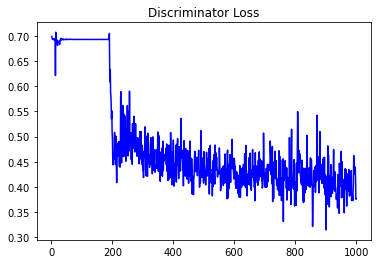

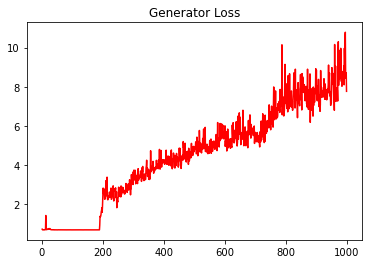

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.14312856360108822


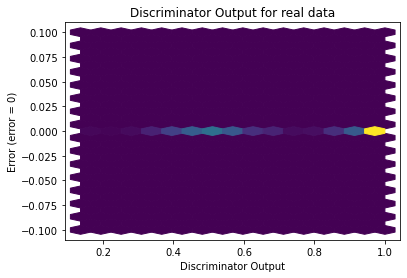

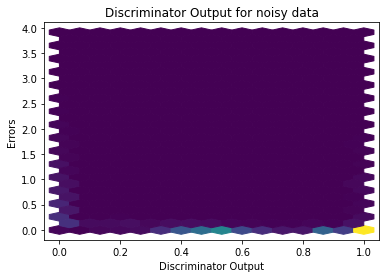

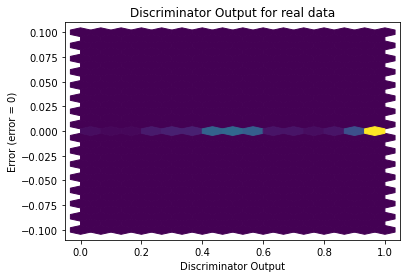

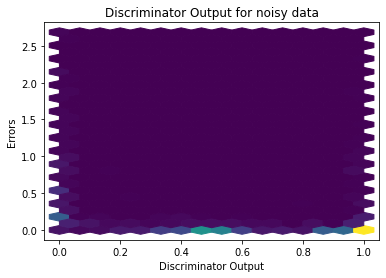

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

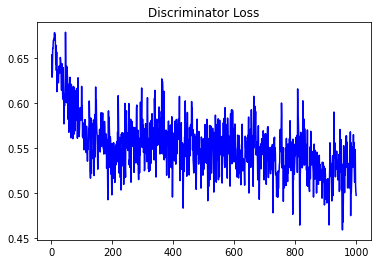

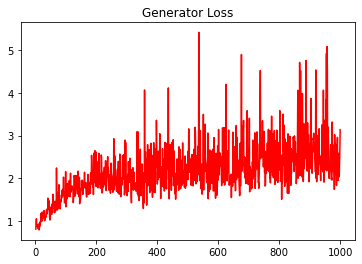

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.06989992011483613


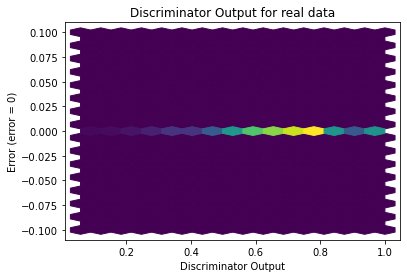

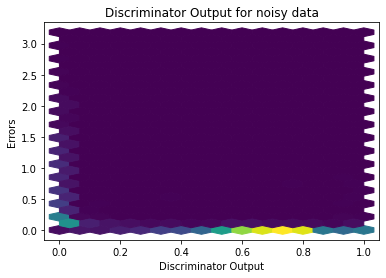

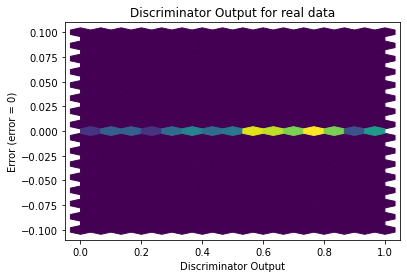

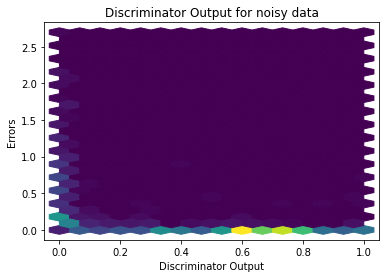

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


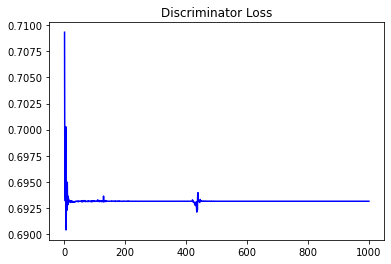

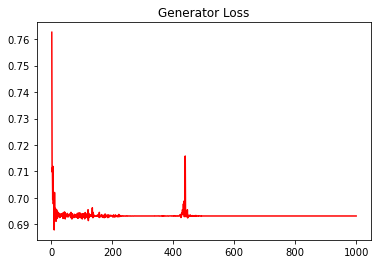

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.1271180606149621


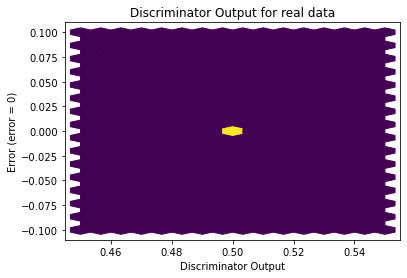

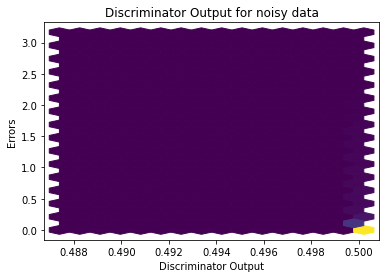

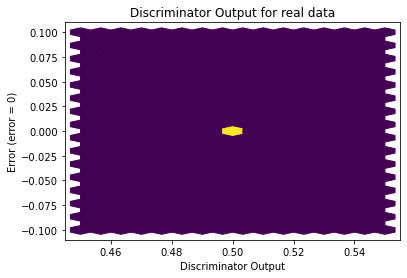

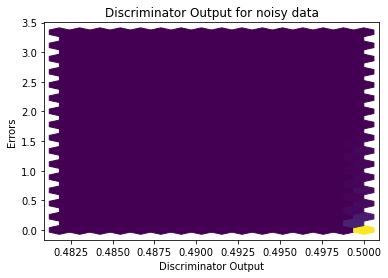

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


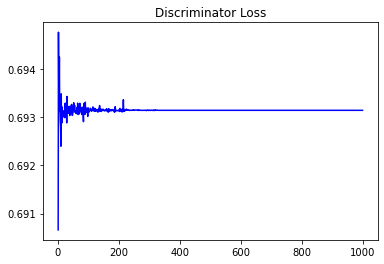

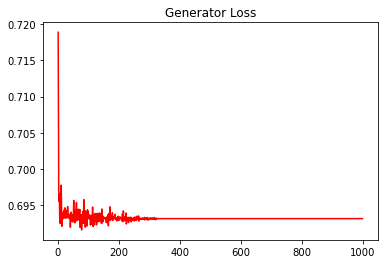

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.04778598497295147


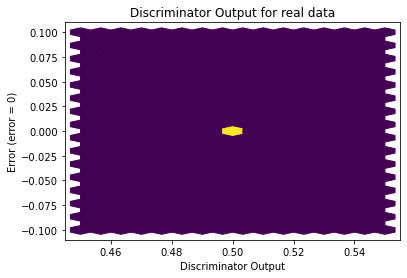

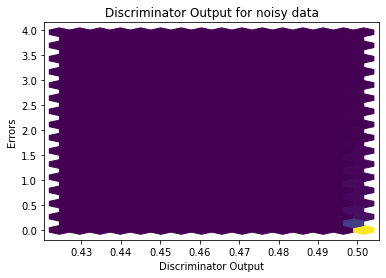

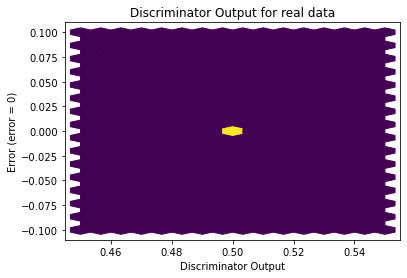

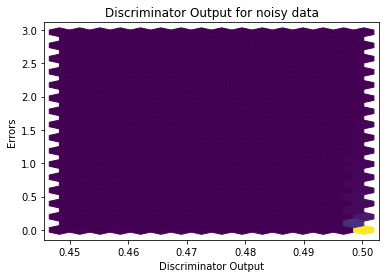

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0193]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0379]], requires_grad=True)
